# Theory

### **1. Dataset Source:**  

***Dataset Link: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images?select=train***

The 'CIFAKE: Real and AI-Generated Synthetic Images' dataset, which comprises two categories of images—real and AI-generated (fake)—is the dataset used in this investigation. The CIFAKE repository provided this dataset, which is openly accessible for use in deep learning and machine learning applications.

### **2. Image Classification: An Overview**  

#### **2.1) How Image Classification Works:**  

A labeled dataset is usually used to train a machine learning model for imagine classification. By modifying its internal parameters to reduce classification mistakes, the model learns to map image features to labels during training. When labeled examples are used to oversee the model, this is referred to as supervised learning. (GeeksforGeeks, 2024)

#### **2.2) Importance and Applications:**  
 
Image classification serves as a foundational task in numerous fields, enabling machines to interpret visual data with human-like precision. It finds applications in:  

- ***Medical Imaging***: Diagnosing diseases from medical images. (GeeksforGeeks, 2024)  
- ***Autonomous Vehicles***: Identifying road signs, pedestrians, and objects. (GeeksforGeeks, 2024)  
- ***Facial Recognition***: Enhancing security systems and social media tagging. (GeeksforGeeks, 2024)  
- ***Retail and E-commerce***: Recognizing products for cataloging. (GeeksforGeeks, 2024)  
- ***Environmental Monitoring***: Classifying land types and tracking wildlife. (GeeksforGeeks, 2024)

#### **2.3) Challenges and Considerations:**  

The key challenges in image classification include:  
- Variations in lighting, object orientation, and backgrounds. (GeeksforGeeks, 2024)   
- Class imbalance, where certain classes have significantly fewer examples. (GeeksforGeeks, 2024)   
- Balancing model complexity to avoid underfitting or overfitting. (GeeksforGeeks, 2024)

### **3. Why the Dataset is Appropriate for the CNN Model**

***The CIFAKE dataset is appropriate for training a Convolutional Neural Network (CNN) because:***  

- **Binary Classification**: The dataset comprises two classes (REAL and FAKE), ideal for binary classification models.  
- **Visual Features**: CNNs excel at capturing complex visual patterns, making them suitable for tasks involving real versus AI-generated image differentiation.  
- **Scalability**: The dataset size provides sufficient training and testing data to ensure reliable performance evaluation.

### **4. What Analysis is Going to be Performed** 

The analysis aims to classify images as real or fake using a CNN model built from scratch. The process involves:

#### **4.1) Exploratory Analysis and Data Wrangling:**  
- ***Image Preprocessing***: Rescaling, data augmentation, and limiting dataset size for manageable computations.  
- ***Subset Creation***: Restricting the dataset to an equal number of images per class to avoid class imbalance.  

#### **4.2) Questions to Answer:**  
- Can a CNN classify images with high accuracy using the CIFAKE dataset?  
- How do preprocessing techniques and model configurations impact performance?  

#### **4.3) Overfitting:**  
Overfitting is addressed using:  
- ***Dropout Layers***: Preventing the model from relying too heavily on specific neurons.  
- ***Early Stopping***: Monitoring validation performance to halt training when improvement stagnates.  

#### **4.4) Underfitting:**  
To counter underfitting:  
- ***Model Complexity***: Designing a CNN architecture capable of learning intricate patterns.  
- ***Proper Preprocessing***: Ensuring the input data retains meaningful features.  

#### **4.5) Evaluation Metrics:**  
- ***Confusion Matrix***: Assessing true positives, true negatives, false positives, and false negatives.  
- ***Accuracy and Loss Graphs***: Tracking training and validation performance over epochs.  
- ***ROC Curve and AUC Score***: Evaluating model discriminative ability and overall effectiveness.

### **5. Alternative Methods**  
While CNNs are used in this project, alternative methods such as logistic regression with feature extraction (e.g., ResNet50) or Support Vector Machines (SVM) could also be explored. CNNs, however, remain the most suitable due to their strength in processing image data directly.

### **6. References for Theory**  

GeeksforGeeks. (2024, June 20). What is Image Classification. Retrieved October 1, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/what-is-image-classification/



# Code

## ***EDA and Data Wrangling:***  

### ***Define Utility Classes and Functions:***

In [8]:
# ***************************************************************************************
#    Title: Easily Image Data Preparation with ImageDataGenerator in Tensorflow
#    Author: Medium
#    Date Code/Created: 20 October 2024
#    Date Retrieved: 22 April 2024
#    Code version: 1
#    Availability: https://iqbalpa.medium.com/easily-image-data-preparation-with-imagedatagenerator-in-tensorflow-5fd75fb32bc2
#
# ***************************************************************************************

# Import necessary libraries
import zipfile
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Class for handling dataset-related tasks
class DataHandler:
    @staticmethod
    def unzip_data(zip_file_path, extraction_path):
        """Unzips the dataset."""
        # Unzips the provided file to the given extraction path
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extraction_path)
        print("Dataset unzipped successfully.")
        
    @staticmethod
    def limit_files(directory, max_images):
        """Limits the number of images per class."""
        # Iterate through the directories for each class (REAL/FAKE)
        for label in ["REAL", "FAKE"]:
            label_dir = os.path.join(directory, label)
            all_files = os.listdir(label_dir)
            
            # Limit the number of images to half the specified max
            if len(all_files) > max_images // 2:
                selected_files = random.sample(all_files, max_images // 2)
                
                # Delete the files that were not randomly selected
                for file in all_files:
                    if file not in selected_files:
                        os.remove(os.path.join(label_dir, file))
        print(f"Reduced dataset to {max_images} images.")

### ***Data Loader Class:***

In [9]:
# ***************************************************************************************
#    Title: Easily Image Data Preparation with ImageDataGenerator in Tensorflow
#    Author: Medium
#    Date Code/Created: 20 October 2024
#    Date Retrieved: 22 April 2024
#    Code version: 1
#    Availability: https://iqbalpa.medium.com/easily-image-data-preparation-with-imagedatagenerator-in-tensorflow-5fd75fb32bc2
#
# ***************************************************************************************

# Class for loading training and test data using ImageDataGenerator
class DataLoader:
    def __init__(self, extraction_path, input_shape, batch_size, max_images):
        # Initialize with the path to the extracted dataset, input shape for images, batch size, and max number of images
        self.extraction_path = extraction_path
        self.input_shape = input_shape
        self.batch_size = batch_size
        self.max_images = max_images

    def load_data(self):
        """Loads training and testing data."""
        # Configure ImageDataGenerator for data augmentation and rescaling
        train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2)
        test_datagen = ImageDataGenerator(rescale=1.0/255)

        # Define directories for training and testing data
        train_dir = os.path.join(self.extraction_path, 'train')
        test_dir = os.path.join(self.extraction_path, 'test')

        # Apply the file limiting function to the directories
        DataHandler.limit_files(train_dir, self.max_images)
        DataHandler.limit_files(test_dir, self.max_images)

        # Load the training data with specified settings
        train_data = train_datagen.flow_from_directory(
            train_dir, target_size=self.input_shape[:2], batch_size=self.batch_size, class_mode='binary'
        )
        
        # Load the test data with specified settings
        test_data = test_datagen.flow_from_directory(
            test_dir, target_size=self.input_shape[:2], batch_size=self.batch_size, class_mode='binary'
        )
        
        # Return the loaded training and test data
        return train_data, test_data

## ***Display Sample Images***

In [10]:
# Display sample images to visualize the dataset distribution
import matplotlib.pyplot as plt

def display_sample_images(data):
    """Displays sample images with their labels."""
    # Get a batch of images and their corresponding labels
    batch = next(data)
    images, labels = batch[0], batch[1]
    
    # Set up the plotting area for displaying 9 images
    plt.figure(figsize=(10, 10))
    
    # Loop through the images and display them in a 3x3 grid
    for i in range(9):
        plt.subplot(3, 3, i + 1)    
        plt.imshow(images[i])      
        plt.title("REAL" if labels[i] == 0 else "FAKE")    
        plt.axis("off")
    
    plt.show()

## ***CNN Model***

In [11]:
# ***************************************************************************************
#    Title: Convolutional Neural Network (CNN) | TensorFlow Core
#    Author: Medium
#    Date Code/Created: 30 October 2024
#    Date Retrieved: 16 August 2023
#    Code version: 1
#    Availability: https://www.tensorflow.org/guide/keras/sequential_model
#
# ***************************************************************************************

# Build CNN model from scratch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Building a custom CNN model with multiple convolutional layers, max pooling, and dropout for binary classification.

def build_cnn(input_shape):
    """Creates a custom CNN model."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        # Dropout to prevent overfitting by randomly setting 50% of units to 0
        Dropout(0.5),
        # Output layer with sigmoid activation for binary classification
        Dense(1, activation='sigmoid') 
    ])

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

## ***Visualisation***

In [12]:
# ***************************************************************************************
#    Title: AUC ROC Curve in Machine Learning
#    Author: GeeksforGeeks
#    Date Code/Created: 05 Novemeber 2024
#    Date Retrieved: 06 August 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/auc-roc-curve/
#
# ***************************************************************************************

# ***************************************************************************************
#    Title: Compute Classification Report and Confusion Matrix in Python
#    Author: GeeksforGeeks
#    Date Code/Created: 05 Novemeber 2024
#    Date Retrieved: 18 March 2022
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/
#
# ***************************************************************************************

# ***************************************************************************************
#    Title: How to Plot Confusion Matrix with Labels in Sklearn?
#    Author: GeeksforGeeks
#    Date Code/Created: 05 Novemeber 2024
#    Date Retrieved: 17 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/
#
# ***************************************************************************************

# Visualisation utilities
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

def evaluate_model(model, test_data, history):
    """Visualises model training metrics and evaluates performance."""
    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Confusion matrix
    y_true = test_data.classes
    y_pred = (model.predict(test_data) > 0.5).astype("int32").flatten()
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["REAL", "FAKE"], yticklabels=["REAL", "FAKE"])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(classification_report(y_true, y_pred, target_names=["REAL", "FAKE"]))

    # ROC curve
    y_probs = model.predict(test_data).ravel()
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

## ***Hypertuning***

In [13]:
# Training and evaluation pipeline
from tensorflow.keras.callbacks import EarlyStopping

def run_pipeline(zip_file_path, extraction_path, input_shape, batch_size, max_images, epochs):
    """Runs the entire pipeline from data extraction to evaluation."""
    DataHandler.unzip_data(zip_file_path, extraction_path)
    data_loader = DataLoader(extraction_path, input_shape, batch_size, max_images)
    train_data, test_data = data_loader.load_data()

    # Display a few sample images for verification  
    display_sample_images(train_data)

    # Build the CNN model and set up early stopping to avoid overfitting  
    model = build_cnn(input_shape)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        callbacks=[early_stopping]
    )

    # Evaluate the trained model
    evaluate_model(model, test_data, history)

## ***Run the Pipeline***

Dataset unzipped successfully.
Reduced dataset to 5000 images.
Reduced dataset to 5000 images.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


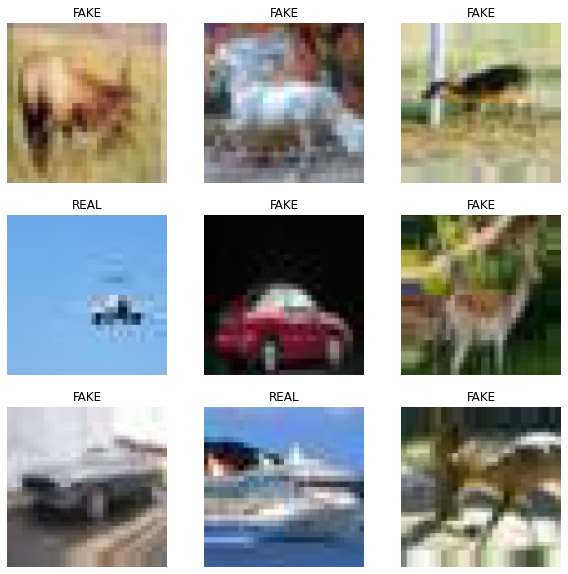

Epoch 1/10
157/157 [==============================] - 30s 182ms/step - loss: 0.6001 - accuracy: 0.6694 - val_loss: 0.5012 - val_accuracy: 0.7540
Epoch 2/10
157/157 [==============================] - 28s 175ms/step - loss: 0.4889 - accuracy: 0.7674 - val_loss: 0.5099 - val_accuracy: 0.7586
Epoch 3/10
157/157 [==============================] - 28s 177ms/step - loss: 0.4559 - accuracy: 0.7886 - val_loss: 0.4938 - val_accuracy: 0.7636
Epoch 4/10
157/157 [==============================] - 28s 177ms/step - loss: 0.4301 - accuracy: 0.8014 - val_loss: 0.4607 - val_accuracy: 0.7886
Epoch 5/10
157/157 [==============================] - 28s 178ms/step - loss: 0.4104 - accuracy: 0.8148 - val_loss: 0.4158 - val_accuracy: 0.8132
Epoch 6/10
157/157 [==============================] - 28s 176ms/step - loss: 0.4035 - accuracy: 0.8164 - val_loss: 0.4186 - val_accuracy: 0.8098
Epoch 7/10
157/157 [==============================] - 28s 177ms/step - loss: 0.3880 - accuracy: 0.8258 - val_loss: 0.3878 - val_ac

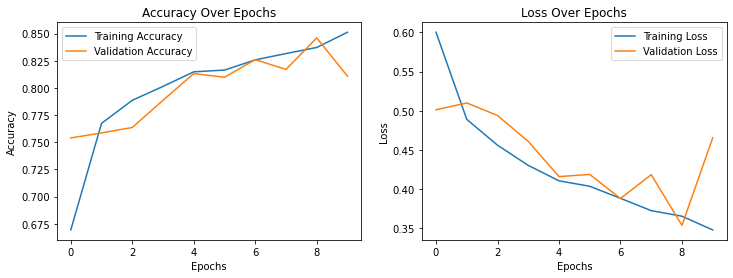

157/157 [==============================] - 5s 31ms/step


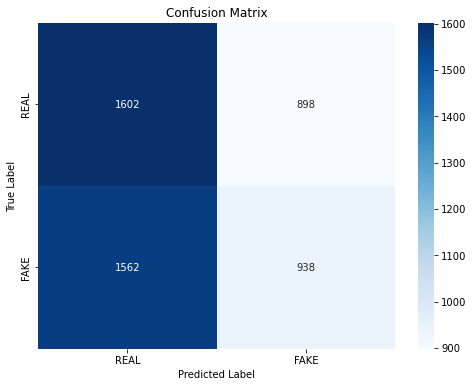

              precision    recall  f1-score   support

        REAL       0.51      0.64      0.57      2500
        FAKE       0.51      0.38      0.43      2500

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.50      5000
weighted avg       0.51      0.51      0.50      5000

157/157 [==============================] - 5s 30ms/step


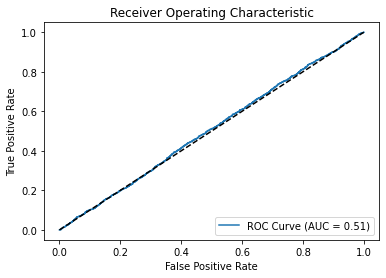

In [14]:
# Run the pipeline
run_pipeline(
    zip_file_path='/home/lab_services_student/cifake-real-and-ai-generated-synthetic-images.zip',
    extraction_path='cifake_data',
    input_shape=(128, 128, 3),
    batch_size=32,
    max_images=5000,
    epochs=10
)


# Interpret the Results

### **1. Training and Validation Accuracy and Loss:**

The model's performance over 10 epochs shows steady learning but hints at potential overfitting:

- **Accuracy:**
  - Training accuracy increased from **66.94% (Epoch 1)** to **85.12% (Epoch 10)**.
  - Validation accuracy started at **75.40%**, peaked at **84.60% (Epoch 9)**, but dropped slightly to **81.08% (Epoch 10)**.
  - The slight decline in validation accuracy in the final epoch suggests diminishing returns or overfitting.

- **Loss:**
  - Training loss consistently decreased from **0.6001** to **0.3477**.
  - Validation loss decreased initially from **0.5012** to **0.3535** but rose slightly to **0.4653** in the final epoch.
  - The increase in validation loss alongside the slight dip in validation accuracy supports the possibility of overfitting.

**Summary:**  
The model demonstrates good learning capabilities but may require early stopping or regularization techniques to mitigate overfitting.

### **2. Confusion Matrix:**

The confusion matrix shows the model's classification results for REAL and FAKE images:

|                  | Predicted REAL | Predicted FAKE |
|------------------|----------------|----------------|
| **Actual REAL**  | 1602           | 898            |
| **Actual FAKE**  | 1562           | 938            |

- The model performs better at identifying **REAL** images but struggles with **FAKE** images, as seen in the high number of false negatives (1562).  

### **3. Precision, Recall, and F1-Score:**

Here’s the detailed classification report:

- **REAL Class:**
  - Precision: **0.51**
  - Recall: **0.64**
  - F1-Score: **0.57**

- **FAKE Class:**
  - Precision: **0.51**
  - Recall: **0.38**
  - F1-Score: **0.43**

**Summary:**  
The model performs better on the REAL class, particularly in recall. However, the low recall and F1-score for the FAKE class indicate significant challenges in identifying FAKE images, suggesting bias or overlapping features in the dataset.

### **4. ROC Curve and AUC:**

- The AUC (Area Under the Curve) is **0.51**, which is only slightly above the random guessing baseline of **0.5**.
- The ROC curve highlights the model's limited ability to distinguish between REAL and FAKE images.

### **Summary and Recommendations:**

The model shows initial learning progress but struggles with generalization and FAKE image detection. Key takeaways include:
- Training performance is solid, but validation metrics fluctuate, suggesting overfitting.
- The model’s performance on the FAKE class is weaker, leading to imbalanced recall and F1-scores.
- The AUC score of **0.51** reflects minimal discriminatory ability.

**Recommendations:**
1. **Data Augmentation or Balancing:** Address potential class imbalance by augmenting FAKE images or oversampling them.
2. **Hyperparameter Tuning:** Experiment with learning rates, batch sizes, or optimizers to improve performance.
3. **Model Architecture:** Use more advanced architectures or pretrained models for better feature extraction.

Implementing these recommendations should significantly improve the model's ability to generalize and classify images accurately.